In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from mlp import MLP
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cardio_train.csv", delimiter=";", index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
mmsc = MinMaxScaler()
variaveis_continuas = ["age", "height", "weight", "ap_hi", "ap_lo", "cholesterol"]
df[variaveis_continuas] = mmsc.fit(df[variaveis_continuas]).transform(df[variaveis_continuas])

In [4]:
df.gender = df.gender.apply(lambda genero: 0 if genero == 2 else genero)

In [5]:
x, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [44]:
# param_grid = dict(layers_size=[[11, 8, 4, 2, 1]],
#                  batch_size=[4096],
#                  learning_rate=[0.01, 0.03],
#                  epochs=[300],
#                  lambd=[0.1],
#                  beta1=np.asarray(range(80, 91,3)) * 0.01
#                  )

# clf = GridSearchCV(MLP(), param_grid, scoring="f1", n_jobs=3, verbose=10)

In [39]:
clf = MLP(beta1=0.80, epochs=300, lambd=0.1, batch_size=2048, layers_size=[11, 8, 4, 2, 1],
              learning_rate=0.003, verbose=False)

In [40]:
clf.fit(X_train, y_train)

In [41]:
clf.score(X_train, y_train)

0.7206081699945046

In [42]:
clf.score(X_test, y_test)

0.7122174619589303

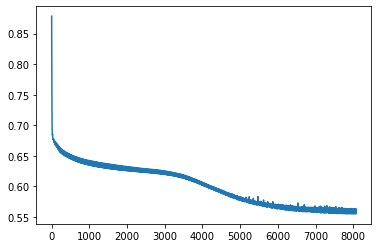

In [43]:
custo = clf.costs

sns.lineplot(y=custo, x=list(range(len(custo))))